In [1]:
import pandas as pd
from flask import Flask, request

%run Predict.ipynb

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


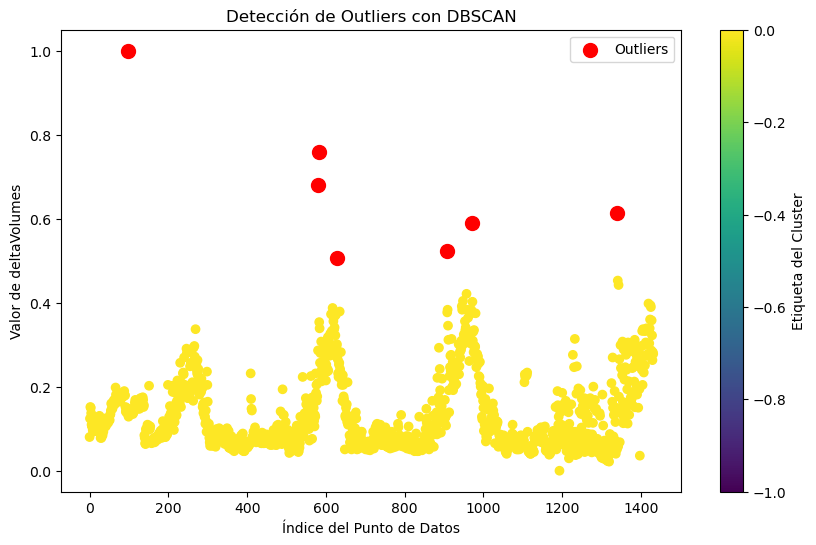

127.0.0.1 - - [21/Sep/2023 10:59:13] "POST /result_outliers HTTP/1.1" 200 -


In [ ]:
app = Flask(__name__)
app.config['MAX_CONTENT_LENGTH'] = 64 * 1024 * 1024

@app.route('/result_predict', methods=['POST'])
def resut_predict():    
    response1_df = pd.read_csv(request.files['response1'])
    response2_df = pd.read_csv(request.files['response2'])

    resultado = predict(response1_df, response2_df)
    resultado_str = str(resultado)
    return resultado_str

@app.route('/result_lstm', methods=['POST'])
def result_lstm():
    response1_df = pd.read_csv(request.files['response1'])
    response2_df = pd.read_excel(request.files['response2'])

    resultado = lstm(response1_df, response2_df)
    resultado_str = str(resultado)

    return resultado_str

@app.route('/result_outliers', methods=['POST'])
def result_outliers():
    response1_df = pd.read_csv(request.files['response1'])
    response2_df = pd.read_excel(request.files['response2'])

    resultado = outliers(response1_df, response2_df)
    resultado_str = str(resultado)

    return resultado_str

if __name__ == '__main__':
    app.run(debug=True, use_reloader=False)